1) Heat map between different variables
2) Are there variables that are particularly significant in terms of explaining the answer to your project question?
3) Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
4) What are the most appropriate tests to use to analyze these relationships?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import math

from scipy.stats import pearsonr

import time


from scipy.stats import boxcox


from matplotlib import cm

import matplotlib.lines as mlines

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

<b> Plot Heat Map of Correlation Between Features</b>

In [4]:
## Reading input data
BC = pd.read_csv("Data/BC_input.csv")
NO2 = pd.read_csv("Data/NO2_input.csv")

In [9]:
BC.drop(columns = ['Unnamed: 0'], inplace=True)
NO2.drop(columns = ['Unnamed: 0'], inplace=True)

In [10]:
### Plot a heat map - Black Carbon
corr_BC = BC.corr()
arr_corr_BC= corr_BC.as_matrix()

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
### Plot a heat map - Nitrogen Dioxide
corr_NO2 = NO2.corr()
arr_corr_NO2= corr_NO2.as_matrix()

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


module://ipykernel.pylab.backend_inline


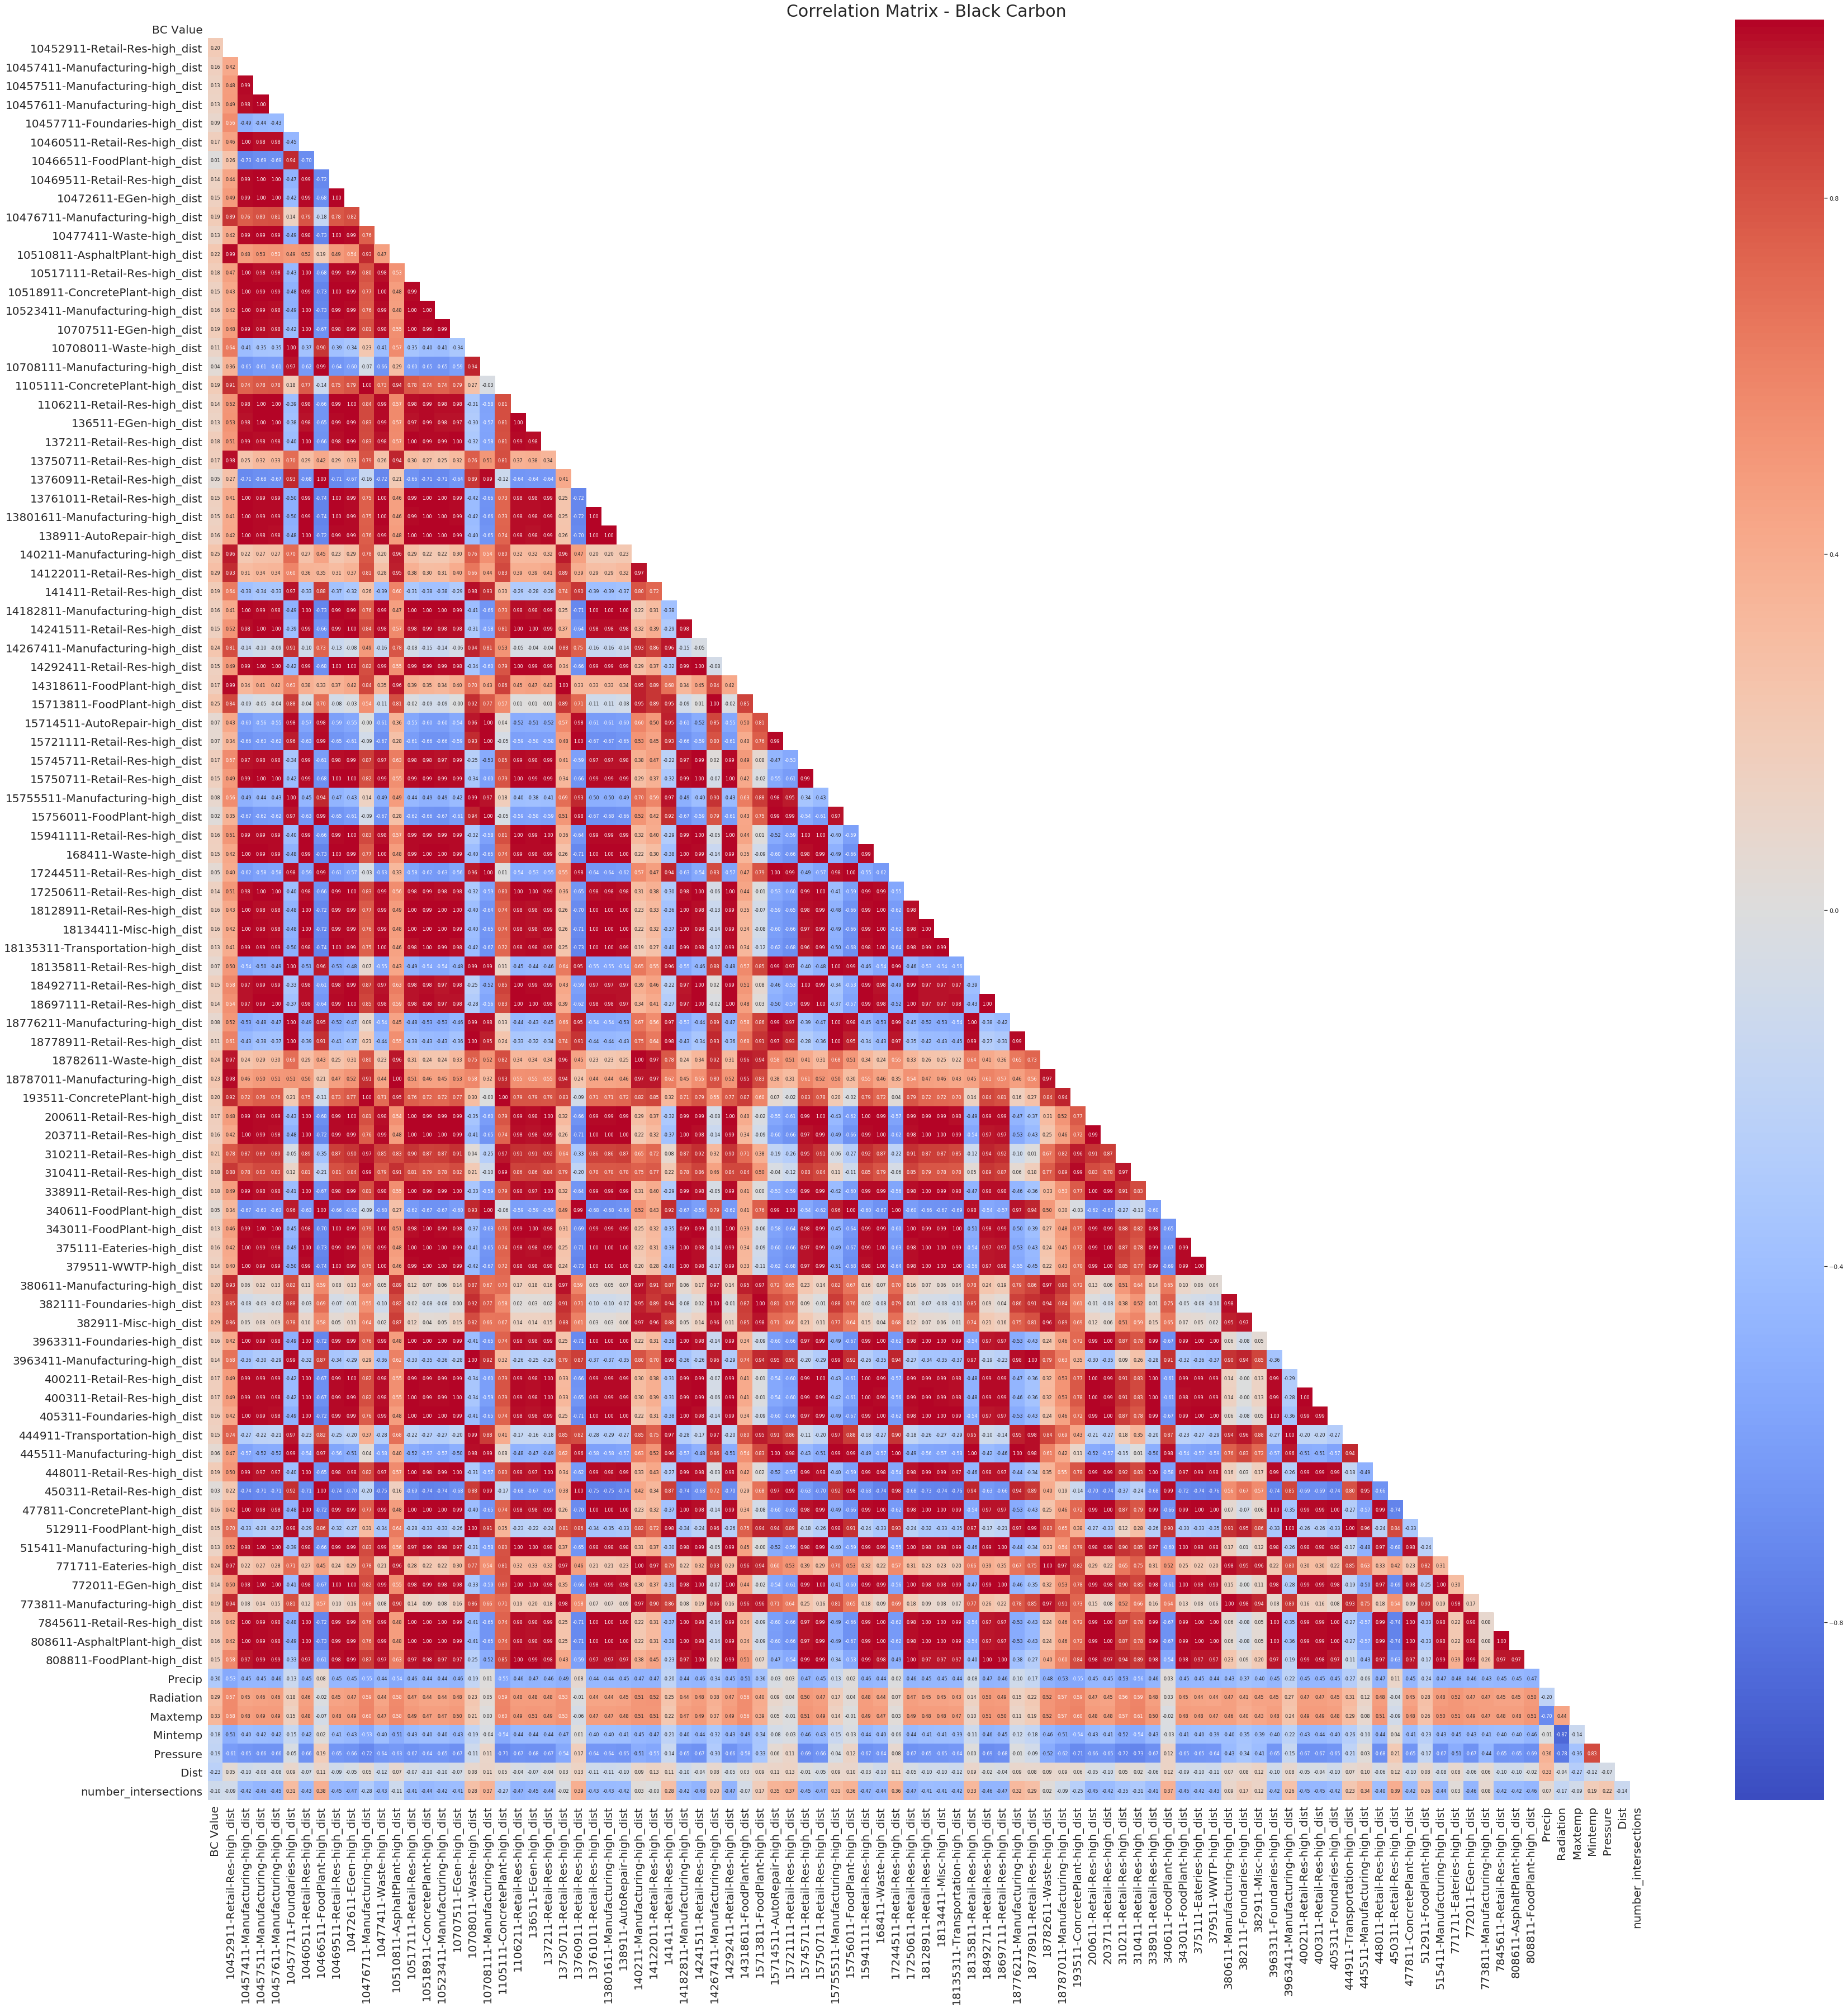

In [12]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_BC[np.triu_indices_from(arr_corr_BC)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_BC, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_BC.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_BC.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_BC.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

module://ipykernel.pylab.backend_inline


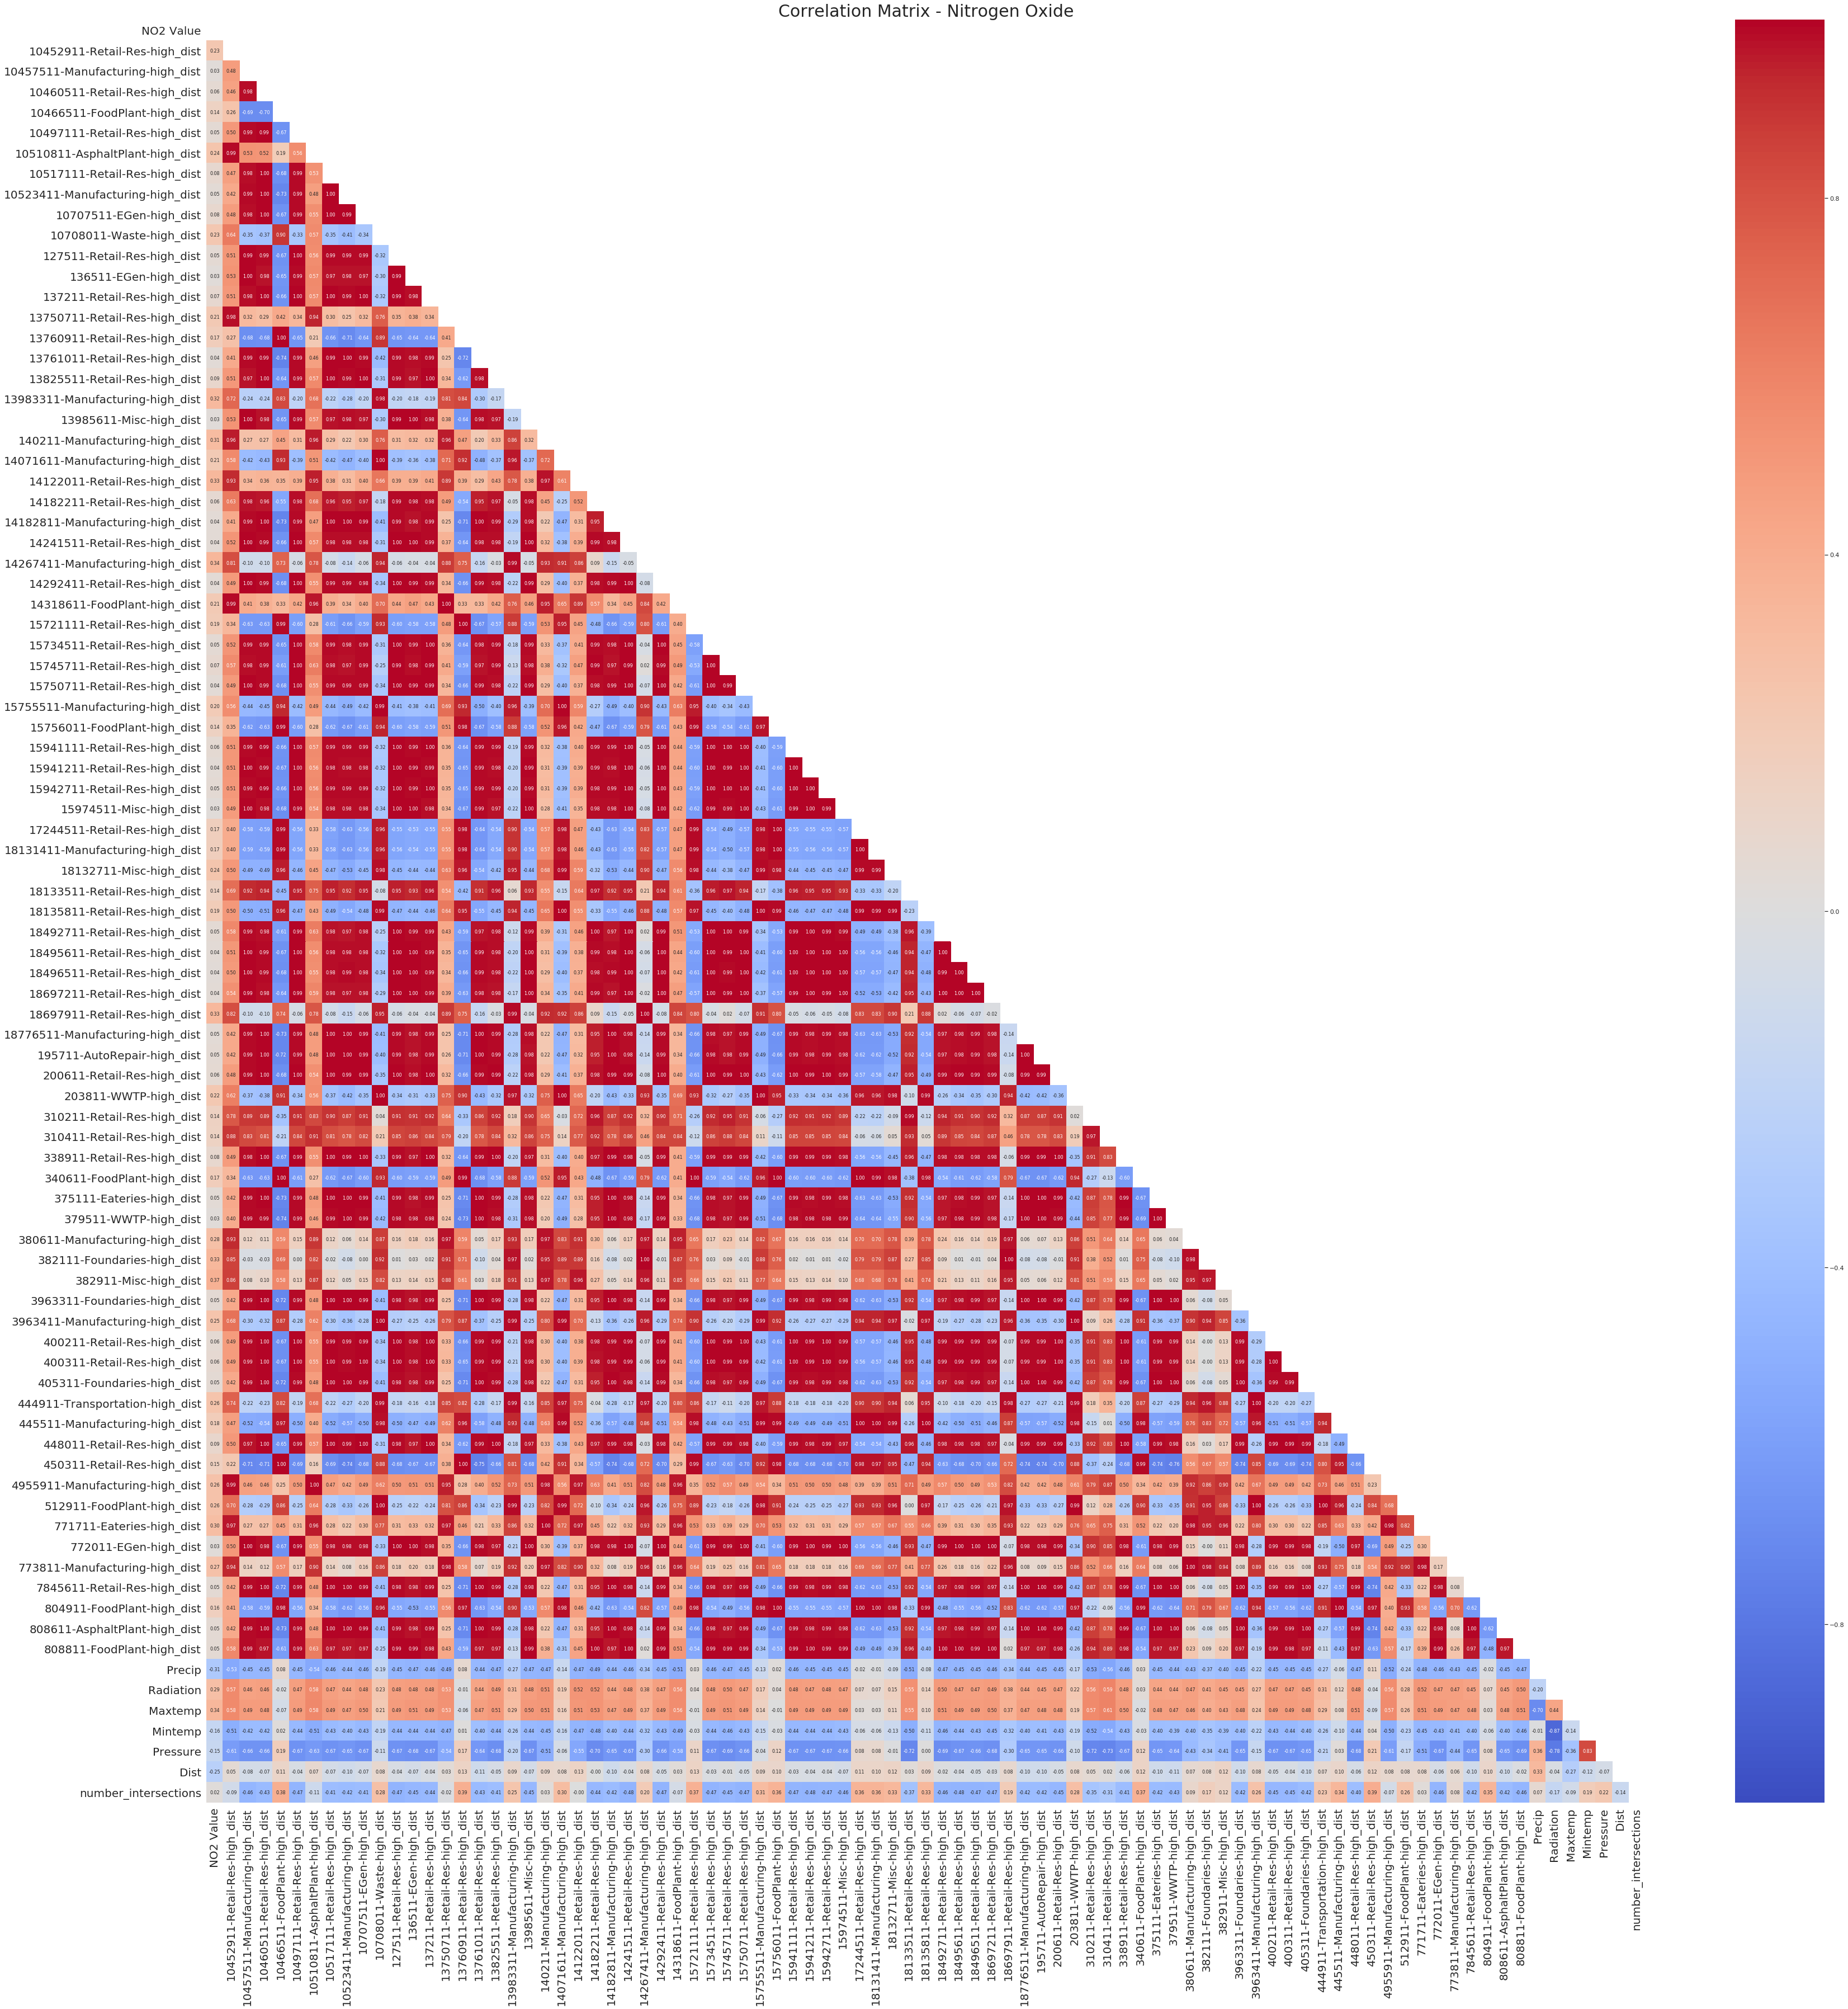

In [13]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_NO2[np.triu_indices_from(arr_corr_NO2)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_NO2, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_NO2.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_NO2.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_NO2.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Oxide', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

### Dropping columns that have a correlation above 0.9

columns = np.full((corr_BC.shape[0],), True, dtype=bool)
for i in range(corr_BC.shape[0]):
    for j in range(i+1, corr_BC.shape[0]):
        if corr_BC.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = BC.columns[columns]
#data = data[selected_columns]

T-test to determine whether is a significant difference between the means of two groups.

1) Is there a significant difference in BC concentration for distance to highways > 4 km and less than 4 km?
1) Is there a significant difference in NO2 concentration for distance to highways > 4 km and less than 4 km?

<b> Correlation coefficint and Testing the Significance of the Correlation Coefficient </b>

We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the data is strong enough to use to model the relationship. Since we have data for the entire population, we can use the population correlation coefficient. 

Null Hypothesis: H$_{0}$: ρ = 0

Alternate Hypothesis: H$_1$: ρ ≠ 0


ρ = population correlation coefficient

Null Hypothesis H$_0$: The population correlation coefficient <b>is not</b> significantly different from zero. There <b>is not</b> a significant linear relationship(correlation) between x and y in the population.

Alternate Hypothesis H$_1$: The population correlation coefficient is significantly different from zero. There <b>is a significant linear relationship</b> (correlation) between x and y in the population.


In [23]:
pearsonr(BC['BC Value'],BC['Precip'])

(-0.2988098927430588, 0.0)

In [30]:
import pingouin as pg
pg.pairwise_corr(BC, method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,BC Value,10452911-Retail-Res-high_dist,pearson,two-sided,21488,0.198287,"[0.19, 0.21]",0.039318,0.039228,0.200949,1.961971e-189,1.148e+185,1.0
1,BC Value,10457411-Manufacturing-high_dist,pearson,two-sided,21488,0.157424,"[0.14, 0.17]",0.024782,0.024692,0.158744,2.857372e-119,1.007e+115,1.0
2,BC Value,10457511-Manufacturing-high_dist,pearson,two-sided,21488,0.134826,"[0.12, 0.15]",0.018178,0.018087,0.135652,1.029504e-87,3.284e+83,1.0
3,BC Value,10457611-Manufacturing-high_dist,pearson,two-sided,21488,0.131531,"[0.12, 0.14]",0.017300,0.017209,0.132298,1.556089e-83,2.229e+79,1.0
4,BC Value,10457711-Foundaries-high_dist,pearson,two-sided,21488,0.090761,"[0.08, 0.1]",0.008237,0.008145,0.091011,1.525456e-40,3.315e+36,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,Mintemp,Dist,pearson,two-sided,21488,-0.117047,"[-0.13, -0.1]",0.013700,0.013608,-0.117586,2.020034e-66,1.935e+62,1.0
4461,Mintemp,number_intersections,pearson,two-sided,21488,0.185921,"[0.17, 0.2]",0.034567,0.034477,0.188109,2.172253e-166,1.111e+162,1.0
4462,Pressure,Dist,pearson,two-sided,21488,-0.066659,"[-0.08, -0.05]",0.004443,0.004351,-0.066758,1.349826e-22,5.097e+18,1.0
4463,Pressure,number_intersections,pearson,two-sided,21488,0.222336,"[0.21, 0.24]",0.049433,0.049345,0.226113,7.160567e-239,2.776e+234,1.0
